<a href="https://colab.research.google.com/github/CaroBrambila/Valores-At-picos/blob/main/Actividad_4_Valores_At%C3%ADpicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#Cargar archivo
df20 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2020", skiprows=5)
df21 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2021", skiprows=3)
df22 = pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2022", skiprows=3)
df23= pd.read_excel("Gastos y costos 20-23.xlsx", sheet_name="2023", skiprows=3)

In [8]:
#Verificamos información del DataFrame
df20.head()
df21.head()
df22.head()
df23.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [10]:
df20.info()
df21.info()
df22.info()
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [11]:
#Identificar valores nulos por columna .isnull()
valores_nulos=df20.isnull().sum()
valores_nulos

,0
FECHA,0
FOLIO,189
UUID,0
RFC,0
PROVEEDOR,0
TIPO GASTO,0
GASTO,2502
DESCRIPCION,0
TC,391
IMPORTE,34


In [14]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
dfnul20 =df20.fillna(method="ffill")
df20a=dfnul20.fillna(method="bfill")

<ipython-input-14-d3937787a1c0>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfnul20 =df20.fillna(method="ffill")
<ipython-input-14-d3937787a1c0>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df20a=dfnul20.fillna(method="bfill")


In [18]:
#Corroboramos valores nulos
valores_nulos2020=df20a.isnull().sum()
valores_nulos2020

,0
FECHA,0
FOLIO,0
UUID,0
RFC,0
PROVEEDOR,0
TIPO GASTO,0
GASTO,0
DESCRIPCION,0
TC,0
IMPORTE,0


In [16]:
Cuantitativas=df20.iloc[:,8:15]

In [17]:
Cualitativas=df20.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

<Figure size 2000x800 with 0 Axes>

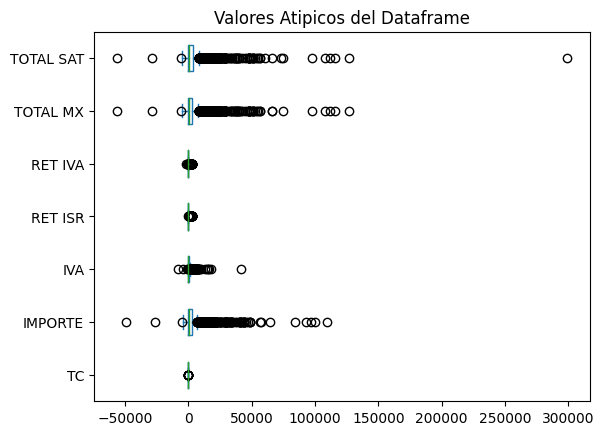

In [19]:
#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(20,8))
Cuantitativas.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [20]:
#Metdo aplicando desviacion estandar para encontrar los limites permitidos, encuentro los valores externos
y=Cuantitativas
Limite_Superior=y.mean()+3*y.std()
Limite_Inferior=y.mean()-3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               4.450857
IMPORTE      25280.893187
IVA           4735.794913
RET ISR        667.271992
RET IVA        958.239955
TOTAL MX     28488.002843
TOTAL SAT    33250.398514
dtype: float64
Limite inferior permitido TC              -2.326488
IMPORTE     -18982.198145
IVA          -3696.145310
RET ISR       -627.750813
RET IVA       -839.215179
TOTAL MX    -21455.655297
TOTAL SAT   -25762.462834
dtype: float64


In [21]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,NaN,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [22]:
#Identificar valores nulos por columna .isnull()
valores_nulos=Cuantitativas1.isnull().sum()
valores_nulos

,0
TC,400
IMPORTE,100
IVA,323
RET ISR,21
RET IVA,74
TOTAL MX,65
TOTAL SAT,45


In [23]:
#Reemplazamos valores atipicos (nulos) con mean
#Realizamos una copia del data
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33
4,1.0,0.00,399.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [24]:
#Identificar valores nulos por columna .isnull()
valores_nulos=Cuantitativas_limpio.isnull().sum()
valores_nulos

,0
TC,0
IMPORTE,0
IVA,0
RET ISR,0
RET IVA,0
TOTAL MX,0
TOTAL SAT,0


In [25]:
#Unimos valores cualitativos
Valores_limpios_2020=pd.concat([Cuantitativas_limpio,Cualitativas],axis=1)
Valores_limpios_2020

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA
0,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,NaN
1,1.0,490.00,78.40,0.0,0.0,568.40,568.40,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN
2,1.0,195.00,31.20,0.0,0.0,226.20,226.20,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN
3,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,NaN
4,1.0,0.00,399.00,0.0,0.0,0.00,0.00,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,1.0,129.79,20.21,0.0,0.0,150.00,150.00,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,NaN
3338,1.0,2284.80,365.57,0.0,0.0,2650.37,2650.37,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,NaN
3339,1.0,163.79,26.21,0.0,0.0,190.00,190.00,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,NaN
3340,1.0,0.00,0.00,0.0,0.0,0.00,0.00,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,NaN


In [41]:
Valores_limpios_2020.to_csv("Valores_atipicos_2020.csv")

## **2021**

In [28]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
dfnul21 =df21.fillna(method="ffill")
df21a=dfnul21.fillna(method="bfill")

<ipython-input-28-51fbf7260806>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfnul21 =df21.fillna(method="ffill")
<ipython-input-28-51fbf7260806>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df21a=dfnul21.fillna(method="bfill")


In [30]:
#Corroboramos valores nulos
valores_nulos2021=df21a.isnull().sum()
valores_nulos2021

,0
FECHA,0
FOLIO,0
UUID,0
RFC,0
PROVEEDOR,0
TIPO GASTO,0
DESCRIPCION,0
MP,0
TC,0
IMPORTE,0


In [42]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

<Figure size 1500x800 with 0 Axes>

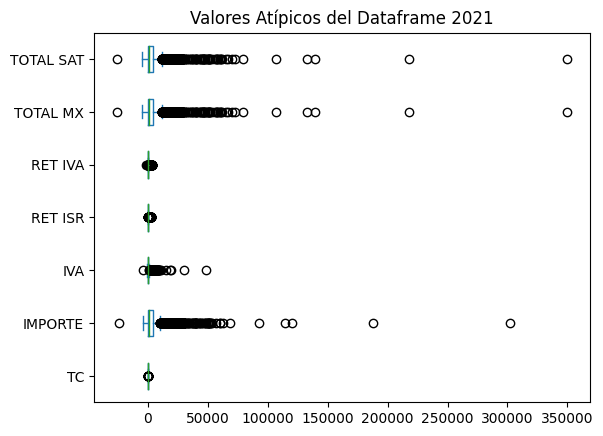

In [44]:
cualitativas21= df21.iloc[ : , [0,1,2,3,4,5,6,7,15,16,17]]       #Columnas consecutivas
cuantitativas21= df21.iloc[ : , [8,9,10,11,12,13,14]]       #Columnas consecutivas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas21.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe 2021")
plt.show() #dibujamos el diagrama

In [60]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas21
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido TC               6.286851
IMPORTE      36154.569820
IVA           5464.876801
RET ISR        900.150092
RET IVA       1200.884906
TOTAL MX     40680.462408
TOTAL SAT    40671.985064
dtype: float64
Limite inferior permitido TC              -3.981398
IMPORTE     -27625.812771
IVA          -4276.811367
RET ISR       -833.428945
RET IVA      -1053.848939
TOTAL MX    -31176.694132
TOTAL SAT   -31129.503410
dtype: float64


In [61]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
outliers21= cuantitativas21[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers21

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [62]:
#Corroboramos valores nulos del dataframe
valores_nulos21=outliers21.isnull().sum()
valores_nulos21

,0
TC,24
IMPORTE,43
IVA,38
RET ISR,32
RET IVA,81
TOTAL MX,40
TOTAL SAT,40


In [65]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean21=outliers21.copy()
data_clean21=data_clean21.fillna(round(outliers21.mean(),1))
data_clean21

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...
3030,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [66]:
#Corroboramos valores nulos del dataframe
valores_nulos21=data_clean21.isnull().sum()
valores_nulos21

,0
TC,0
IMPORTE,0
IVA,0
RET ISR,0
RET IVA,0
TOTAL MX,0
TOTAL SAT,0


In [80]:
# Unimos la columna 'indice_tiempo' con el dataframe
Datos_limpios2021 = pd.concat([cualitativas21, data_clean21], axis=1)
Datos_limpios2021

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.40,568.40
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.20,400.20
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.00,3999.00
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3030,2021-12-01,127043,83F82167-0D14-144E-9D76-045C95F25DDD,PGM881128QIA,"PROMOCIONES GRAFICAS MEXICANAS, S.A. DE C.V.",PUBLICIDAD,Pago,NaN,P,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3031,2021-12-01,11740,B1C60AE0-02BC-4A33-9513-A280F72B5D06,SME0510105C7,SPECTRIS MEXICO S DE RL DE CV,COMPRAS,INSULATED T/C WIRE,PUE,I,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3032,2021-12-01,1092957089,255F4A25-5753-4208-8F6B-0B59E5AE4741,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,I,Vigente,NaN,1.0,22826.46,705.58,0.0,0.0,23532.04,23532.04
3033,2021-12-01,747826,D8226E4F-9241-44C3-86A4-CDE9BC932528,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,I,Vigente,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [81]:
#Convertir DataFrame a CSV
Datos_limpios2021.to_csv("Datos_limpios_2021.csv")

## **2022**

In [31]:
#Elimanar columnas innecesarias
df22otros=df22.drop(["Otros"], axis=1)
df22otros

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62,I,Vigente,NaN
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN


In [32]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
dfnul22 =df22otros.fillna(method="ffill")
df22a=dfnul22.fillna(method="bfill")

<ipython-input-32-1843465edd80>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfnul22 =df22otros.fillna(method="ffill")
<ipython-input-32-1843465edd80>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df22a=dfnul22.fillna(method="bfill")


In [35]:
#Corroboramos valores nulos
valores_nulos22=df22a.isnull().sum()
valores_nulos22

,0
Fecha,0
Folio,0
UUID,0
RFC,0
Proveedor,0
TIPO GASTO,0
Descripción,0
MP,0
TC,0
Importe,0


In [33]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [46]:
Cuantitativas22=df22.iloc[:,8:15]

In [47]:
Cualitativas22=df22.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

<Figure size 1500x800 with 0 Axes>

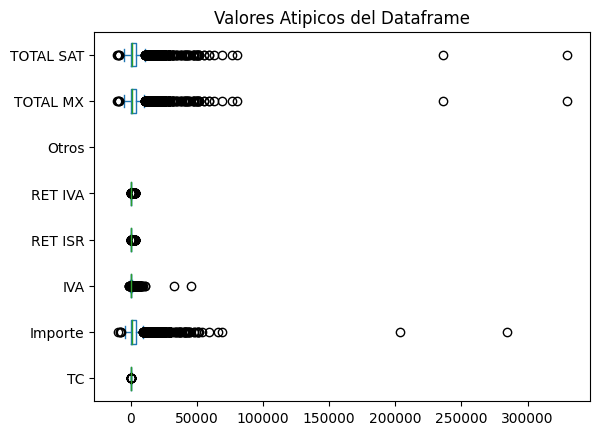

In [49]:
#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(15,8))
df22.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [51]:
#Metodo aplicando cuartiles encuentro cuartiles 0.25 y 0.75
y=Cuantitativas22

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr=percentile75-percentile25

Limite_Superior_2022= percentile75+1.5*iqr
Limite_Inferior_2022=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior_2022)
print("Limite inferior permitido", Limite_Inferior_2022)

Limite superior permitido TC              1.00
Importe      9058.90
IVA          1031.15
RET ISR         0.00
RET IVA         0.00
Otros            NaN
TOTAL MX    10374.70
dtype: float64
Limite inferior permitido TC             1.00
Importe    -5435.34
IVA         -618.69
RET ISR        0.00
RET IVA        0.00
Otros           NaN
TOTAL MX   -6224.82
dtype: float64


In [52]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas2_1=Cuantitativas22[(y<=Limite_Superior_2022)&(y>=Limite_Inferior_2022)]
Cuantitativas2_1

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.0
2573,1.0,NaN,516.32,0.0,0.0,NaN,NaN
2574,NaN,0.00,0.00,0.0,0.0,NaN,0.0
2575,NaN,0.00,0.00,0.0,0.0,NaN,0.0


In [53]:
#Identificar valores nulos por columna .isnull()
valores_nulos=Cuantitativas2_1.isnull().sum()
valores_nulos

,0
TC,654
Importe,305
IVA,303
RET ISR,71
RET IVA,70
Otros,2577
TOTAL MX,291


In [54]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_2022_limpio=Cuantitativas2_1.copy()
Cuantitativas_2022_limpio=Cuantitativas_2022_limpio.fillna(round(Cuantitativas2_1.mean(),1))
Cuantitativas_2022_limpio

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.0
2573,1.0,1449.20,516.32,0.0,0.0,NaN,1711.5
2574,1.0,0.00,0.00,0.0,0.0,NaN,0.0
2575,1.0,0.00,0.00,0.0,0.0,NaN,0.0


In [55]:
#Identificar valores nulos por columna .isnull()
valores_nulos=Cuantitativas_2022_limpio.isnull().sum()
valores_nulos

,0
TC,0
Importe,0
IVA,0
RET ISR,0
RET IVA,0
Otros,2577
TOTAL MX,0


In [67]:
Valores_limpios_2022=pd.concat([Cuantitativas_2022_limpio,Cualitativas22],axis=1)
Valores_limpios_2022

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TOTAL SAT,Tipo,Status
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,6439.60,I,Vigente
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,6440.30,I,Vigente
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,0.00,I,Vigente
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,Vigente
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,0.00,I,Vigente
2573,1.0,1449.20,516.32,0.0,0.0,NaN,1711.5,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,17826.62,I,Vigente
2574,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,0.00,P,Vigente
2575,1.0,0.00,0.00,0.0,0.0,NaN,0.0,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,0.00,P,Vigente


In [84]:
# Unimos la columna 'indice_tiempo' con el dataframe
Datos_limpios2022 = pd.concat([Cualitativas22, Valores_limpios_2022], axis=1)
Datos_limpios2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TOTAL SAT,Tipo,...,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TOTAL SAT,Tipo,Status
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,6439.60,I,...,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,6439.60,I,Vigente
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,6440.30,I,...,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,6440.30,I,Vigente
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,0.00,I,...,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,0.00,I,Vigente
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,...,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,Vigente
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,...,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,0.00,P,Vigente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,0.00,I,...,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,0.00,I,Vigente
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,17826.62,I,...,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,17826.62,I,Vigente
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,0.00,P,...,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,0.00,P,Vigente
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,0.00,P,...,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,0.00,P,Vigente


In [85]:
#Convertir DataFrame a CSV
Datos_limpios2022.to_csv("Datos_limpios_2022.csv")

## **2023**

In [36]:
#Elimanar columnas innecesarias
df23otros=df23.drop(["Otros"], axis=1)
df23otros

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,I,Vigente,NaN
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,I,Vigente,NaN
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,I,Vigente,NaN


In [37]:
#Sustituir valores nulos por valores no nulos hacia adelante  "forward fill" ("ffill")
#Filtro por columnas
dfsinnulos23 =df23otros.fillna(method="ffill")
df23a=dfsinnulos23.fillna(method="bfill")

<ipython-input-37-b4c10d227064>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfsinnulos23 =df23otros.fillna(method="ffill")
<ipython-input-37-b4c10d227064>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df23a=dfsinnulos23.fillna(method="bfill")


In [40]:
#Corroboramos valores nulos
valores_nulos23=df23a.isnull().sum()
valores_nulos23

,0
Fecha,0
Folio,0
UUID,0
RFC,0
Proveedor,0
TIPO GASTO,0
Descripción,0
MP,0
FP,0
TC,0


In [57]:
#Identificar valores nulos por columna .isnull()
valores_nulos=df23.isnull().sum()
valores_nulos

,0
Fecha,0
Folio,13
UUID,0
RFC,0
Proveedor,0
TIPO GASTO,8
Descripción,0
MP,71
FP,71
TC,0


In [58]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

<Figure size 1500x800 with 0 Axes>

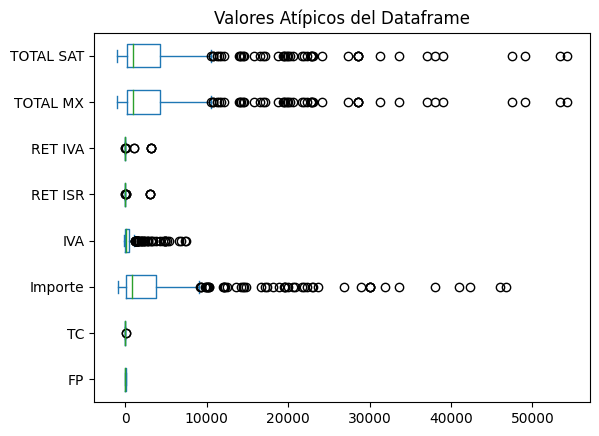

In [59]:
cualitativas23= df23.iloc[ : , [0,1,2,3,4,5,6,7,17,18,19]]       #Columnas consecutivas
cuantitativas23= df23.iloc[ : , [8,9,10,11,12,13,15,16]]       #Columnas consecutivas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas23.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [68]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=cuantitativas23
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             186.819391
TC               4.957143
Importe      26557.244156
IVA           3761.774707
RET ISR        931.175004
RET IVA       1022.471745
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: float64
Limite inferior permitido FP             -98.819391
TC              -2.774030
Importe     -18708.366775
IVA          -2766.954304
RET ISR       -869.142712
RET IVA       -947.124289
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: float64


In [70]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
outliers23= Cuantitativas_2022_limpio[(y<=Limite_Superior)&(y>=Limite_Inferior)]
outliers23

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
2572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2574,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
#Corroboramos valores nulos del dataframe
valores_nulos23=outliers23.isnull().sum()
valores_nulos23

,0
TC,2182
Importe,2193
IVA,2193
RET ISR,2184
RET IVA,2186
Otros,2577
TOTAL MX,2189


In [72]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean23=outliers23.copy()
data_clean23=data_clean23.fillna(round(outliers23.mean(),1))
data_clean23

,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6
1,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3
2,1.0,0.00,0.00,0.0,0.0,NaN,0.0
3,1.0,0.00,0.00,0.0,0.0,NaN,0.0
4,1.0,0.00,0.00,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...
2572,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2573,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2574,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2575,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1


In [73]:
#Corroboramos valores nulos del dataframe
valores_nulos23=data_clean23.isnull().sum()
valores_nulos23

,0
TC,0
Importe,0
IVA,0
RET ISR,0
RET IVA,0
Otros,2577
TOTAL MX,0


In [75]:
# Unimos la columna 'indice_tiempo' con el dataframe
Datos_limpios20 = pd.concat([Cualitativas, Valores_limpios_2020], axis=1)
Datos_limpios20

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,...,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,...,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,NaN
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,...,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,...,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,I,Vigente,NaN
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,...,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,NaN
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,P,Vigente,...,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,2020-12-01,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,...,125834,80BCB1D8-673F-495B-9C2A-4AC9F9CB38E5,SQS110113MU0,SERVICIO QUINTANA SUR S.A DE C.V,COMBUSTIBLE,G VTA,32011 MAGNA,I,Vigente,NaN
3338,2020-12-01,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,...,37652,D4C7C1FB-03A7-4046-A2BD-03EBE7DA861E,PSQ790724C90,"CIA. PERIODISTICA DEL SOL DE QUERETARO, S.A. D...",PUBLICIDAD,G VTA,82101504-PUBLICIDAD EN PERIODICOSCALOR Y CONTROL,I,Vigente,NaN
3339,2020-12-01,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,...,160,FFCEE7D4-1F38-4D44-BE02-EB042DAACEE7,SQX981027RY5,"SUPER Q, S. A. DE C. V.",ALIMENTOS,G VTA,REF VICTORIA GROSELLA 3 LT PET NR,I,Vigente,NaN
3340,2020-12-01,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,...,634875,8DFF4F01-2F8B-4085-B116-05A314108B02,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,G FINA,COMISIONES E INTERESES,I,Vigente,NaN


In [86]:
# Unimos la columna 'indice_tiempo' con el dataframe
Datos_limpios2023 = pd.concat([cualitativas23, data_clean23], axis=1)
Datos_limpios2023

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,P,Vigente,NaN,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,1.0,0.00,0.00,0.0,0.0,NaN,0.0
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,1.0,0.00,0.00,0.0,0.0,NaN,0.0
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,1.0,0.00,0.00,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2573,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2574,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1
2575,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1513.10,173.70,0.0,0.0,NaN,1789.1


In [87]:
#Convertir DataFrame a CSV
Datos_limpios2023.to_csv("Datos_limpios_2023.csv")